# Musical Scales and the Circle of fifths

> I want to show how to compute scales and plot a circle of fifths

#### we should plot a polar plot

> I hope I can plot the Circle of Fifths that way someday

> underconstruction

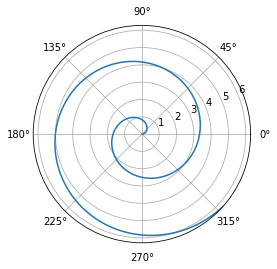

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint 


r = np.arange(0, 2*np.pi, 0.01)
theta = .6 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2*np.pi)

#plt.savefig("this.svg", bbox_inches='tight')


In [30]:
#from IPython.display import Image, SVG, display
#SVG("this.svg")

 > plotting `something which does not exist yet` is hard, so lets continue making some code for notes and scales and then think how to arrange the best circle of fifth in code later

In [31]:
from musical.theory import Scale, Note, Chord

In [32]:
root = Note("F3")

In [33]:
fmaj = Scale(root, "major")

In [34]:
print(fmaj)

f - g - a - a# - c - d - e


In [35]:
from musical.theory import NAMED_SCALES
NAMED_SCALES

{'major': (2, 2, 1, 2, 2, 2, 1),
 'minor': (2, 1, 2, 2, 1, 2, 2),
 'melodicminor': (2, 1, 2, 2, 2, 2, 1),
 'harmonicminor': (2, 1, 2, 2, 1, 3, 1),
 'pentatonicmajor': (2, 2, 3, 2, 3),
 'bluesmajor': (3, 2, 1, 1, 2, 3),
 'pentatonicminor': (3, 2, 2, 3, 2),
 'bluesminor': (3, 2, 1, 1, 3, 2),
 'augmented': (3, 1, 3, 1, 3, 1),
 'diminished': (2, 1, 2, 1, 2, 1, 2, 1),
 'chromatic': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 'wholehalf': (2, 1, 2, 1, 2, 1, 2, 1),
 'halfwhole': (1, 2, 1, 2, 1, 2, 1, 2),
 'wholetone': (2, 2, 2, 2, 2, 2),
 'augmentedfifth': (2, 2, 1, 2, 1, 1, 2, 1),
 'japanese': (1, 4, 2, 1, 4),
 'oriental': (1, 3, 1, 1, 3, 1, 2),
 'ionian': (2, 2, 1, 2, 2, 2, 1),
 'dorian': (2, 1, 2, 2, 2, 1, 2),
 'phrygian': (1, 2, 2, 2, 1, 2, 2),
 'lydian': (2, 2, 2, 1, 2, 2, 1),
 'mixolydian': (2, 2, 1, 2, 2, 1, 2),
 'aeolian': (2, 1, 2, 2, 1, 2, 2),
 'locrian': (1, 2, 2, 1, 2, 2, 2)}

In [36]:
scales = [
    Scale(Note("F2"), "major"),
    Scale(Note("D3"), "minor"),
    Scale(Note("C2"), "major"),
    Scale(Note("D4"), "ionian"),
    Scale(Note("D#"), "bluesminor"),
]

for sc in scales:
    print(sc.root.note, sc.scale_name[0], sc)
    


f major f - g - a - a# - c - d - e
d minor d - e - f - g - a - a# - c
c major c - d - e - f - g - a - b
d major d - e - f# - g - a - b - c#
d# bluesminor d# - f# - g# - a - a# - c#


In [37]:
pd.DataFrame([
    {"root": sc.root.note, "scale": sc.scale_name[0], "notes": str(sc).split(" - ")} 
    for sc in scales
])

,root,scale,notes
0,f,major,"[f, g, a, a#, c, d, e]"
1,d,minor,"[d, e, f, g, a, a#, c]"
2,c,major,"[c, d, e, f, g, a, b]"
3,d,major,"[d, e, f#, g, a, b, c#]"
4,d#,bluesminor,"[d#, f#, g#, a, a#, c#]"


## how similar are scales?
> lets try levenshtein distance to compare scales

In [38]:
def levenshtein_distance(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    
    return distances[len(token1)][len(token2)]

compare_with = scales[0]
for i, scale in enumerate(scales):
    print(f"comparing '{scale.root} {scale.scale_name[0]}' with '{compare_with.root} {compare_with.scale_name[0]}' is {levenshtein_distance(str(scale), str(compare_with))}")
    

comparing 'f0 major' with 'f0 major' is 0.0
comparing 'd0 minor' with 'f0 major' is 9.0
comparing 'c0 major' with 'f0 major' is 8.0
comparing 'd0 major' with 'f0 major' is 10.0
comparing 'd#0 bluesminor' with 'f0 major' is 13.0


> note how Fmaj compares to Dmin and Cmaj.. Despite Dmin using the same notes as Fmaj, the computed distance is bigger than to Cmaj

> levenshtein was a bad attempt, there is no way levenshtein distance can reflect musical similarity, so we need a better comparison method.

### for now lets create an instrument database

In [39]:
from dataclasses import dataclass

@dataclass
class Instrument:
    name: str
    scale: Scale
    
    #def __repr__(self):
    #    return f"{self.name}, {self.scale}"
    

In [42]:
bass_duduk_f = Instrument("Bass Duduk F", Scale(Note("F2"), "major"))
duduk_a = Instrument("Duduk A", Scale(Note("A3"), "major"))
naf_d = Instrument("NA Flute D", Scale(Note("D3"), "pentatonicminor"))
naf_a1 = Instrument("NA Flute A", Scale(Note("A3"), "pentatonicminor"))
naf_a2 = Instrument("NA Flute A", Scale(Note("A5"), "pentatonicminor"))
naf_gis = Instrument("NA Flute G#", Scale(Note("G#4"), "pentatonicminor"))
naf_bb = Instrument("NA Flute Bb", Scale(Note("A#4"), "pentatonicminor"))
naf_f = Instrument("NA Flute F", Scale(Note("F4"), "pentatonicminor"))
naf_dis = Instrument("Flute D#", Scale(Note("D#4"), "pentatonicminor"))
low_whistle_d = Instrument("Low Tin Whistle D", Scale(Note("D4"), "major"))
zampona_g = Instrument("Zampona G", Scale(Note("G4"), "major"))
quena_e = Instrument("Quena E", Scale(Note("E4"), "pentatonicminor"))
whistle_bb = Instrument("Tin Whistle Bb", Scale(Note("A#4"), "major"))

whistle_d = Instrument("Tin Whistle D", Scale(Note("D5"), "major"))
sopilka_c = Instrument("Sopilka C", Scale(Note("C5"), "major"))
sopilka_f = Instrument("Alt Sopilka F", Scale(Note("F4"), "major"))
okarina_c = Instrument("Soprano Okarina C", Scale(Note("C6"), "major"))


instruments = [
    bass_duduk_f, 
    duduk_a, 
    naf_d, 
    naf_a1,
    naf_a2,
    naf_gis,
    naf_bb,
    naf_f,
    naf_dis,
    low_whistle_d,
    whistle_d,
    whistle_bb,
    zampona_g,
    quena_e,
    sopilka_c,
    sopilka_f,
    okarina_c,
]



### lets build some scale comparision functions

1. to get all notes from a scale
2. to compute set intersection for note sets from 2 scales
3. descendingly sort known instruments by the amount of shared notes


> we need to do better than levenshtein


In [43]:
def notes_from_scale(Scale):
    return [Scale.get(i).note for i in range(len(Scale.intervals))]

def scales_shares_notes(A, B):
    return set(notes_from_scale(A)) & set(notes_from_scale(B))

Fmaj, Dmin = instruments[0].scale, instruments[2].scale

notes_from_scale(Fmaj)

['f', 'g', 'a', 'a#', 'c', 'd', 'e']

In [44]:
notes_from_scale(Dmin)

['d', 'f', 'g', 'a', 'c']

#### this function can tell us which notes are shared between the scales

In [45]:
scales_shares_notes(Dmin, Fmaj)

{'a', 'c', 'd', 'f', 'g'}

In [46]:
def find_similar_instrument(this, instruments, limit=5):
    found = []
    for candidate in [i for i in instruments if i != this]:
        shared = scales_shares_notes(this.scale, candidate.scale)
        found.append( (shared, candidate) )
        
    return sorted(found, key=lambda tup: len(tup[0]), reverse=True)[:limit]


In [47]:
find_similar_instrument(zampona_g, instruments, 3)

[({'a', 'b', 'd', 'e', 'f#', 'g'},
  Instrument(name='Low Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'b', 'd', 'e', 'f#', 'g'},
  Instrument(name='Tin Whistle D', scale=Scale(d0, (2, 2, 1, 2, 2, 2, 1)))),
 ({'a', 'b', 'c', 'd', 'e', 'g'},
  Instrument(name='Sopilka C', scale=Scale(c0, (2, 2, 1, 2, 2, 2, 1))))]

### lets build some functions to convert this pandas df

In [48]:
def serialize_instrument(instrument):
    return {
        "name": instrument.name, 
        "scale": instrument.scale.scale_name[0], 
        "notes": [n.note for n in instrument.scale],
    }


def serialize_similar_instrument_search(search_item):
    result = serialize_instrument(search_item[1])
    shared_notes = [n if n in search_item[0] else None for n in result["notes"]  ]
    result.update({"shared_notes": str(shared_notes), "notes": str(result["notes"]) })
    return result


def to_dataframe(data, fn):
    serialized = [fn(i) for i in data]
    return pd.DataFrame(serialized)



In [49]:
to_dataframe(
    find_similar_instrument(duduk_a, instruments, 9),
    serialize_similar_instrument_search
)

,name,scale,notes,shared_notes
0,Low Tin Whistle D,major,"['d', 'e', 'f#', 'g', 'a', 'b', 'c#']","['d', 'e', 'f#', None, 'a', 'b', 'c#']"
1,Tin Whistle D,major,"['d', 'e', 'f#', 'g', 'a', 'b', 'c#']","['d', 'e', 'f#', None, 'a', 'b', 'c#']"
2,Zampona G,major,"['g', 'a', 'b', 'c', 'd', 'e', 'f#']","[None, 'a', 'b', None, 'd', 'e', 'f#']"
3,NA Flute G#,pentatonicminor,"['g#', 'b', 'c#', 'd#', 'f#']","['g#', 'b', 'c#', None, 'f#']"
4,Quena E,pentatonicminor,"['e', 'g', 'a', 'b', 'd']","['e', None, 'a', 'b', 'd']"
5,Sopilka C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","[None, 'd', 'e', None, None, 'a', 'b']"
6,Soprano Okarina C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","[None, 'd', 'e', None, None, 'a', 'b']"
7,Bass Duduk F,major,"['f', 'g', 'a', 'a#', 'c', 'd', 'e']","[None, None, 'a', None, None, 'd', 'e']"
8,NA Flute A,pentatonicminor,"['a', 'c', 'd', 'e', 'g']","['a', None, 'd', 'e', None]"


In [50]:
to_dataframe(
    find_similar_instrument(bass_duduk_f, instruments, 4),
    serialize_similar_instrument_search
)

,name,scale,notes,shared_notes
0,Alt Sopilka F,major,"['f', 'g', 'a', 'a#', 'c', 'd', 'e']","['f', 'g', 'a', 'a#', 'c', 'd', 'e']"
1,Tin Whistle Bb,major,"['a#', 'c', 'd', 'd#', 'f', 'g', 'a']","['a#', 'c', 'd', None, 'f', 'g', 'a']"
2,Sopilka C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","['c', 'd', 'e', 'f', 'g', 'a', None]"
3,Soprano Okarina C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","['c', 'd', 'e', 'f', 'g', 'a', None]"


In [51]:
to_dataframe(
    find_similar_instrument(zampona_g, instruments, 4),
    serialize_similar_instrument_search
)

,name,scale,notes,shared_notes
0,Low Tin Whistle D,major,"['d', 'e', 'f#', 'g', 'a', 'b', 'c#']","['d', 'e', 'f#', 'g', 'a', 'b', None]"
1,Tin Whistle D,major,"['d', 'e', 'f#', 'g', 'a', 'b', 'c#']","['d', 'e', 'f#', 'g', 'a', 'b', None]"
2,Sopilka C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","['c', 'd', 'e', None, 'g', 'a', 'b']"
3,Soprano Okarina C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","['c', 'd', 'e', None, 'g', 'a', 'b']"


In [52]:
to_dataframe(
    find_similar_instrument(naf_bb, instruments, 4),
    serialize_similar_instrument_search
)

,name,scale,notes,shared_notes
0,NA Flute F,pentatonicminor,"['f', 'g#', 'a#', 'c', 'd#']","['f', 'g#', 'a#', None, 'd#']"
1,Flute D#,pentatonicminor,"['d#', 'f#', 'g#', 'a#', 'c#']","['d#', None, 'g#', 'a#', 'c#']"
2,NA Flute G#,pentatonicminor,"['g#', 'b', 'c#', 'd#', 'f#']","['g#', None, 'c#', 'd#', None]"
3,Tin Whistle Bb,major,"['a#', 'c', 'd', 'd#', 'f', 'g', 'a']","['a#', None, None, 'd#', 'f', None, None]"


In [54]:
to_dataframe(
    find_similar_instrument(quena_e, instruments, 6),
    serialize_similar_instrument_search
)

,name,scale,notes,shared_notes
0,Low Tin Whistle D,major,"['d', 'e', 'f#', 'g', 'a', 'b', 'c#']","['d', 'e', None, 'g', 'a', 'b', None]"
1,Tin Whistle D,major,"['d', 'e', 'f#', 'g', 'a', 'b', 'c#']","['d', 'e', None, 'g', 'a', 'b', None]"
2,Zampona G,major,"['g', 'a', 'b', 'c', 'd', 'e', 'f#']","['g', 'a', 'b', None, 'd', 'e', None]"
3,Sopilka C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","[None, 'd', 'e', None, 'g', 'a', 'b']"
4,Soprano Okarina C,major,"['c', 'd', 'e', 'f', 'g', 'a', 'b']","[None, 'd', 'e', None, 'g', 'a', 'b']"
5,Bass Duduk F,major,"['f', 'g', 'a', 'a#', 'c', 'd', 'e']","[None, 'g', 'a', None, None, 'd', 'e']"


In [55]:
def get_by_index(i, circle):
    return circle[i % len(circle)]

circle = [Scale(Note("C").transpose(x*7), "major") for x in range(12)]

In [56]:
get_by_index(4, circle)

Scale(e0, (2, 2, 1, 2, 2, 2, 1))

In [57]:
for x in range(12):
    A, B = get_by_index(x, circle),  get_by_index(x+1, circle)
    print(A.root.note, "->", B.root.note, " = ", B.root - A.root)

c -> g  =  7
g -> d  =  -5
d -> a  =  7
a -> e  =  -5
e -> b  =  7
b -> f#  =  -5
f# -> c#  =  -5
c# -> g#  =  7
g# -> d#  =  -5
d# -> a#  =  7
a# -> f  =  -5
f -> c  =  -5


In [58]:
print(Scale(Note("G"), "major").relative_scale())

e - f# - g - a - b - c - d


In [59]:
Scale(Note("E"), "minor").relative_scale() == Scale(Note("G"), "major")

True

Well, lets build on that and display musical notes with a lilypond wrapper:

In [60]:
%%bash
pip install abjad abjad-ext-ipython &> /dev/null

In [61]:
%load_ext abjadext.ipython
import abjad as ab

def notes_from_scale2(Scale):
    return [Scale.get(i) for i in range(len(Scale.intervals))]

def show_notes(notes, t=4):
    ab.show(ab.Staff( [ab.Note(n.index, ab.Duration(1, t)) for n in notes ] ))

In [62]:
show_notes(notes_from_scale2(Scale(Note("G"), "major")))
show_notes(notes_from_scale2(Scale(Note("G"), "major").relative_scale()))

In [63]:
Chord.progression(Scale(Note("A"), "major"), 3)

[Chord((Note('a3'), Note('c#4'), Note('e4'))),
 Chord((Note('b3'), Note('d4'), Note('f#4'))),
 Chord((Note('c#4'), Note('e4'), Note('g#4'))),
 Chord((Note('d4'), Note('f#4'), Note('a4'))),
 Chord((Note('e4'), Note('g#4'), Note('b4'))),
 Chord((Note('f#4'), Note('a4'), Note('c#5'))),
 Chord((Note('g#4'), Note('b4'), Note('d5')))]

In [64]:
Chord.progression(Scale(Note("F"), "major"), 3)

[Chord((Note('f3'), Note('a3'), Note('c4'))),
 Chord((Note('g3'), Note('a#3'), Note('d4'))),
 Chord((Note('a3'), Note('c4'), Note('e4'))),
 Chord((Note('a#3'), Note('d4'), Note('f4'))),
 Chord((Note('c4'), Note('e4'), Note('g4'))),
 Chord((Note('d4'), Note('f4'), Note('a4'))),
 Chord((Note('e4'), Note('g4'), Note('a#4')))]

In [65]:
def add_inverted(d):
    r = d.copy()
    r.update({v: k for k, v in d.items()})
    return r

sequence_major = add_inverted({
    "I": 0,
    "ii": 1,
    "iii": 2,
    "IV": 3,
    "V": 4,
    "vi": 5,
    "vii°": 6,
})

sequence_minor = add_inverted({
    "i": 0,
    "ii°": 1,
    "III": 2,
    "iv": 3,
    "v": 4,
    "VI": 5,
    "VII": 6,
})

#### Major chord F

In [66]:
Note('f3') - Note('a3'), Note('a3') - Note('c4')

(-4, -3)

#### Minor chord Gm

In [67]:
Note('g3') - Note('a#3'), Note('a#3')-  Note('d4')

(-3, -4)

#### Diminished chord Edim

In [68]:
Note('e4') - Note('g4'), Note("g4") -Note('a#4')

(-3, -3)

In [69]:
def formatChord(c):
    r, t, f = c.notes
    return f"""   {t - r}    {f - t}
  ___  ___
 /   \\/   \\
{r} - {t} - {f}\n\n\n"""


def show_chords(chords):
    for i, chord in enumerate(chords):
        root, third, fifth = chord.notes
        print(formatChord(chord))

In [70]:
show_chords(Chord.progression(Scale(Note("F"), "major"), 3))

   4    3
  ___  ___
 /   \/   \
f3 - a3 - c4



   3    4
  ___  ___
 /   \/   \
g3 - a#3 - d4



   3    4
  ___  ___
 /   \/   \
a3 - c4 - e4



   4    3
  ___  ___
 /   \/   \
a#3 - d4 - f4



   4    3
  ___  ___
 /   \/   \
c4 - e4 - g4



   3    4
  ___  ___
 /   \/   \
d4 - f4 - a4



   3    3
  ___  ___
 /   \/   \
e4 - g4 - a#4





In [71]:
show_chords(Chord.progression(Scale(Note("D"), "minor"), 3))

   3    4
  ___  ___
 /   \/   \
d3 - f3 - a3



   3    3
  ___  ___
 /   \/   \
e3 - g3 - a#3



   4    3
  ___  ___
 /   \/   \
f3 - a3 - c4



   3    4
  ___  ___
 /   \/   \
g3 - a#3 - d4



   3    4
  ___  ___
 /   \/   \
a3 - c4 - e4



   4    3
  ___  ___
 /   \/   \
a#3 - d4 - f4



   4    3
  ___  ___
 /   \/   \
c4 - e4 - g4





#### lets build a function to create chord progression from roman numerals

In [72]:
def chords(scale, progression):
    pick = progression.split("-")
    if "major" in scale.scale_name: 
        translate = sequence_major
    elif "minor" in scale.scale_name:
        translate = sequence_minor
    
    candidates = Chord.progression(scale, 3)
    
    return [candidates[translate[p]] for p in pick]
    
chords(Fmaj, "I-V-vi-IV")

[Chord((Note('f3'), Note('a3'), Note('c4'))),
 Chord((Note('c4'), Note('e4'), Note('g4'))),
 Chord((Note('d4'), Note('f4'), Note('a4'))),
 Chord((Note('a#3'), Note('d4'), Note('f4')))]

In [73]:
%%bash
#pip install midiutil

In [74]:
from midiutil.MidiFile import MIDIFile


def to_midi(notes, bpm=100):
    mf = MIDIFile(2)
    track = 0

    time = 0
    mf.addTrackName(track, time, "YOLLO")
    mf.addTempo(track, time, bpm)
    
    bar_ms = 60000 / bpm

    channel = 0
    volume = 100

    pitch = 60
    time = 0
    duration = 8
    
    for n in notes:
        if isinstance(n, Note):
            mf.addNote(track, channel, n.index, time, duration, volume)
        if isinstance(n, Chord):
            for n in n.notes:
                mf.addNote(track, channel, n.index, time, duration, volume)
        
        time += 8  
    
    for n in notes:
        if isinstance(n, Note):
            mf.addNote(track, channel, n.index, time, duration, volume)
        if isinstance(n, Chord):
            for n in n.notes:
                mf.addNote(track, channel, n.index, time, duration, volume)
        
        time += 8
    
    time = 0
            
    return mf

In [75]:
mf = to_midi(chords(Fmaj, "I-V-vi-IV"), 100)

In [76]:
with open("fmaj_chords.mid", "wb") as output_file:
    mf.writeFile(output_file)

In [78]:
mf = to_midi(chords(zampona_g.scale, "I-vi-IV-V-ii"), 100)
with open("gmaj_chords.mid", "wb") as output_file:
    mf.writeFile(output_file)

In [79]:
mf = to_midi(chords(Scale(Note("D"), "minor"), "i-III-iv-v-VI"), 100)
with open("dmin_chords.mid", "wb") as output_file:
    mf.writeFile(output_file)

In [80]:
mf = to_midi(
    chords(Scale(Note("F"), "major"), "ii-vi-iii-IV-V-ii"),
    100,
)
with open("fmaj_chords.mid", "wb") as output_file:
    mf.writeFile(output_file)

In [81]:
for c in chords(Scale(Note("A"), "major"), "I-ii-vi-iii-IV-V-ii"):
    print("-".join([str(n) for n in c.notes]))

a3-c#4-e4
b3-d4-f#4
f#4-a4-c#5
c#4-e4-g#4
d4-f#4-a4
e4-g#4-b4
b3-d4-f#4


In [82]:
for c in chords(Scale(Note("A"), "major"), "ii-vi-iii-IV-V-ii"):
    print("-".join([str(n) for n in c.notes]))

b3-d4-f#4
f#4-a4-c#5
c#4-e4-g#4
d4-f#4-a4
e4-g#4-b4
b3-d4-f#4


In [83]:
notes = chords(Scale(Note("D"), "minor"), "i-VII-VI-VII")

mf = to_midi(notes, 100)

with open("Dmin_chords.mid", "wb") as output_file:
    mf.writeFile(output_file)
    
show_chords(notes)

   3    4
  ___  ___
 /   \/   \
d3 - f3 - a3



   4    3
  ___  ___
 /   \/   \
c4 - e4 - g4



   4    3
  ___  ___
 /   \/   \
a#3 - d4 - f4



   4    3
  ___  ___
 /   \/   \
c4 - e4 - g4



